In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [138]:
with open('salaryData.json') as f:
    data = json.load(f)

dataset = pd.DataFrame(data)

# columns not used in model
columns = ['timestamp', 'otherdetails', 'dmaid', 'rowNumber', 
            'company', 'cityid',
           'level', 'tag', 'bonus', 'basesalary', 'stockgrantvalue'] # TODO: consider adding these to model
dataset.drop(columns, inplace=True, axis=1)
dataset = dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)
dataset

,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender
0,Product Manager,127,"Redwood City, CA",1.5,1.5,
1,Software Engineer,100,"San Francisco, CA",5,3,
2,Product Manager,310,"Seattle, WA",8,0,
3,Software Engineering Manager,200,"Redmond, WA",9,9,
4,Software Engineer,173,"Vancouver, BC, Canada",11,1,
...,...,...,...,...,...,...
31773,Software Engineer,195,"Santa Monica, CA",3,1,
31774,Hardware Engineer,151,"San Diego, CA",3,3,
31775,Data Scientist,161,"New York, NY",4,2,Male
31776,Product Designer,397,"San Francisco, CA",7,7,Female


In [139]:
dataset["totalyearlycompensation"] = pd.to_numeric(dataset["totalyearlycompensation"])
dataset["yearsofexperience"] = pd.to_numeric(dataset["yearsofexperience"])
dataset["yearsatcompany"] = pd.to_numeric(dataset["yearsatcompany"])
# filter out rows with no gender information
dataset = dataset[dataset.gender != ""]
# get rid of outliers
dataset = dataset[dataset["totalyearlycompensation"] < dataset["totalyearlycompensation"].quantile(.96)]
# filter out cities with less than 100 datapoints
dataset_top_cities = dataset.groupby('location').filter(lambda x: len(x) >= 50)

from sklearn import preprocessing
# load the Iris datase
dataset_top_cities["yearsofexperience"] = preprocessing.scale(dataset_top_cities["yearsofexperience"])
dataset_top_cities["yearsatcompany"] = preprocessing.scale(dataset_top_cities["yearsatcompany"])
dataset_top_cities["years"] = dataset_top_cities["yearsofexperience"] * dataset_top_cities["yearsatcompany"]
print(dataset_top_cities) 

                   title  totalyearlycompensation              location  \
449    Software Engineer                    172.0           Seattle, WA   
450    Software Engineer                    325.0     San Francisco, CA   
452    Software Engineer                    145.0           Redmond, WA   
455    Software Engineer                    150.0           Seattle, WA   
456    Software Engineer                    230.0           Redmond, WA   
...                  ...                      ...                   ...   
31767  Software Engineer                    138.0           Boulder, CO   
31769  Software Engineer                    242.0          New York, NY   
31772  Software Engineer                    109.0  Hyderabad, TS, India   
31775     Data Scientist                    161.0          New York, NY   
31776   Product Designer                    397.0     San Francisco, CA   

       yearsofexperience  yearsatcompany  gender     years  
449             0.857147       -0.2064

In [140]:
# categorical data
# categorical_cols = ['title', 'location'] 

# one hot encoding
# dataset_encoded = pd.get_dummies(dataset_top_cities, columns = categorical_cols, drop_first = True)
# dataset_encoded

In [141]:
# multivariate linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# independent and dependent variables
# features = ['yearsofexperience', 'location', 'title','yearsatcompany', 'gender']
features = ['years', 'location', 'title','gender','yearsofexperience']
target = 'totalyearlycompensation'

X = dataset_top_cities[features]
Y = dataset_top_cities[target]

In [142]:
# convert categorical variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# print(X)

# # 80/20 split- 20% training data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [143]:
# define model I am using
model = LinearRegression(normalize = True)

In [144]:
# training process
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [145]:
from sklearn.metrics import mean_squared_error,r2_score
# get model performance
def scores_(model,X,Y):
    y_predict = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
    r2 = r2_score(Y, y_predict)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
print("The model performance of training set")
scores_(model,X_train,Y_train)
print("--------------------------------------")
print("The model performance of testing set")
scores_(model,X_test,Y_test)

The model performance of training set
RMSE is 7.03604551598719
R2 score is 0.49450877505211566
--------------------------------------
The model performance of testing set
RMSE is 7.000099834064271
R2 score is 0.4918500240020105


/Users/shiyuezhang/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalyearlycompensation'>

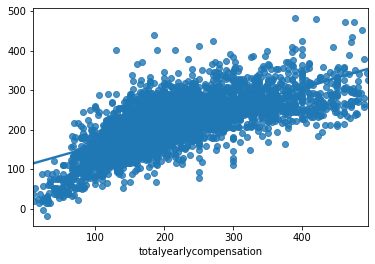

In [50]:
# compare the prediction with actual values in test dataset
predictions = model.predict(X_test)
sns.regplot(Y_test,predictions)

In [155]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [210]:
with open('salaryData.json') as f:
    data = json.load(f)

raw_dataset = pd.DataFrame(data)
# columns not used in model
columns = ['timestamp', 'otherdetails', 'dmaid', 'rowNumber', 
            'company', 'cityid',
           'level', 'tag', 'bonus', 'basesalary', 'stockgrantvalue'] # TODO: consider adding these to model
raw_dataset.drop(columns, inplace=True, axis=1)
raw_dataset = raw_dataset.drop_duplicates()
raw_dataset.reset_index(drop=True, inplace=True)
raw_dataset["totalyearlycompensation"] = pd.to_numeric(raw_dataset["totalyearlycompensation"])
raw_dataset["yearsofexperience"] = pd.to_numeric(raw_dataset["yearsofexperience"])
raw_dataset["yearsatcompany"] = pd.to_numeric(raw_dataset["yearsatcompany"])
raw_dataset = raw_dataset[raw_dataset["totalyearlycompensation"] < raw_dataset["totalyearlycompensation"].quantile(.96)]
raw_dataset = raw_dataset.groupby('location').filter(lambda x: len(x) >= 50)
# filter out rows with no gender information
raw_dataset = raw_dataset[raw_dataset.gender != ""]

In [211]:
dataset = raw_dataset.copy()
dataset.tail()

,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender
31767,Software Engineer,138.0,"Boulder, CO",0.0,0.0,Male
31769,Software Engineer,242.0,"New York, NY",7.0,2.0,Male
31772,Software Engineer,109.0,"Hyderabad, TS, India",12.0,2.0,Male
31775,Data Scientist,161.0,"New York, NY",4.0,2.0,Male
31776,Product Designer,397.0,"San Francisco, CA",7.0,7.0,Female


In [212]:
# from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# dataset['title'] = labelencoder.fit_transform(dataset['title'])
# dataset['location'] = labelencoder.fit_transform(dataset['location'])
# dataset['gender'] = labelencoder.fit_transform(dataset['gender'])
# dataset.tail()

dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset.tail()

,totalyearlycompensation,yearsofexperience,yearsatcompany,title_Data Scientist,title_Hardware Engineer,title_Management Consultant,title_Marketing,title_Product Designer,title_Product Manager,title_Software Engineer,...,"location_Singapore, SG, Singapore","location_Sunnyvale, CA","location_Sydney, NS, Australia","location_Tel Aviv, TA, Israel","location_Toronto, ON, Canada","location_Vancouver, BC, Canada","location_Washington, DC","location_Zurich, ZH, Switzerland",gender_Male,gender_Other
31767,138.0,0.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
31769,242.0,7.0,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
31772,109.0,12.0,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
31775,161.0,4.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31776,397.0,7.0,7.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [214]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('totalyearlycompensation')
test_labels = test_features.pop('totalyearlycompensation')

In [215]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
totalyearlycompensation,218.938557,94.212241
yearsofexperience,7.127429,5.754500
yearsatcompany,2.678302,3.188619
title_Data Scientist,0.042682,0.202146
title_Hardware Engineer,0.037022,0.188823
...,...,...
"location_Vancouver, BC, Canada",0.010521,0.102033
"location_Washington, DC",0.010787,0.103302
"location_Zurich, ZH, Switzerland",0.004195,0.064635
gender_Male,0.829338,0.376226


In [216]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[7.1274290e+00 2.6783020e+00 4.2682115e-02 3.7022240e-02 1.1985618e-02
 7.2579570e-03 2.9631110e-02 7.9904117e-02 6.9363433e-01 5.4334797e-02
 1.7512318e-02 1.8311359e-02 3.0629912e-03 7.6574776e-03 2.5902251e-02
 1.5381542e-02 1.8178185e-02 7.1913702e-03 4.8608338e-03 2.1507524e-02
 4.6610734e-03 4.9940073e-03 1.3783460e-02 3.4558531e-02 6.1259824e-03
 5.2603544e-03 5.0605941e-03 2.3305367e-03 1.8644293e-03 3.0629912e-03
 5.9262221e-03 4.3947264e-03 6.7918496e-03 4.8608338e-03 3.5290984e-03
 4.4613131e-03 1.6380344e-02 1.1985618e-02 4.2615528e-03 2.7100813e-02
 1.8644293e-03 4.0617925e-03 3.6622719e-03 4.4546545e-02 7.6841123e-02
 1.9976029e-03 2.3971235e-02 3.3293380e-03 2.7966441e-03 3.6622719e-03
 3.6622719e-03 4.3281396e-03 4.9940073e-03 3.8620322e-03 6.2591560e-02
 8.2567586e-03 1.9310161e-03 2.0641896e-03 2.5968838e-03 1.8244773e-02
 1.2431748e-01 4.0085230e-02 2.0641896e-03 2.2972433e-02 2.0641896e-03
 1.5541351e-01 4.8608338e-03 4.7276601e-02 3.3959248e-03 3.8620322e-03
 8.523

In [217]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[15. 14.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.]]

Normalized: [[ 1.37  3.55 -0.21 -0.2  -0.11 -0.09 -0.17 -0.29 -1.5   4.17 -0.13 -0.14
  -0.06 -0.09 -0.16 -0.12  7.35 -0.09 -0.07 -0.15 -0.07 -0.07 -0.12 -0.19
  -0.08 -0.07 -0.07 -0.05 -0.04 -0.06 -0.08 -0.07 -0.08 -0.07 -0.06 -0.07
  -0.13 -0.11 -0.07 -0.17 -0.04 -0.06 -0.06 -0.22 -0.29 -0.04 -0.16 -0.06
  -0.05 -0.06 -0.06 -0.07 -0.07 -0.06 -0.26 -0.09 -0.04 -0.05 -0.05 -0.14
  -0.38 -0.2  -0.05 -0.15 -0.05 -0.43 -0.07 -0.22 -0.06 -0.06 -0.09 -0.1
  -0.1  -0.06  0.45 -0.11]]


In [226]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2, name = "dropout1"),
      layers.Dense(128, activation='relu'),
#       layers.Dense(1)
      layers.Dropout(0.2, name = "dropout2"),
      layers.Dense(256,activation = "relu", name = "DenseTwo"),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [227]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [228]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

CPU times: user 50.9 s, sys: 12.3 s, total: 1min 3s
Wall time: 29.2 s


In [221]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

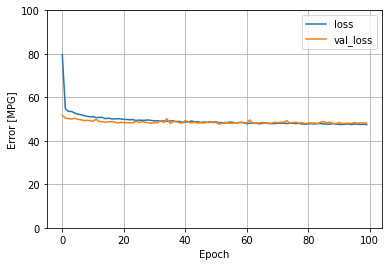

In [222]:
plot_loss(history)

In [223]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [224]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_model,48.739372


The model performance of training set
RMSE is 66.41946931476637
R2 score is 0.4900983206460068


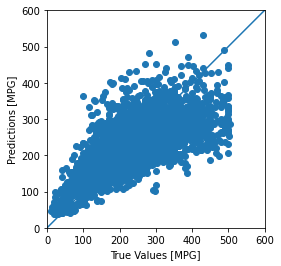

In [225]:
test_predictions = dnn_model.predict(test_features).flatten()

from sklearn.metrics import mean_squared_error,r2_score
# get model performance
def scores_(Y, y_predict):
    rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
    r2 = r2_score(Y, y_predict)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
print("The model performance of training set")
scores_(test_labels,test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

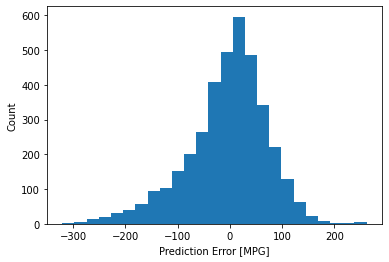

In [209]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')